# Ch3 Least Squares and QR factorization

<a target="_blank" href="https://colab.research.google.com/github/DrJaewookLee/math4ai-notes/blob/main/Notebooks/ch03_Least_Squares_and_QR_Factorization.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## 3.1 Projection and Least Squares

### 3.1.1 Projection and Orthogonal Projections

In [16]:
# Import library
import numpy as np
import matplotlib.pyplot as plt

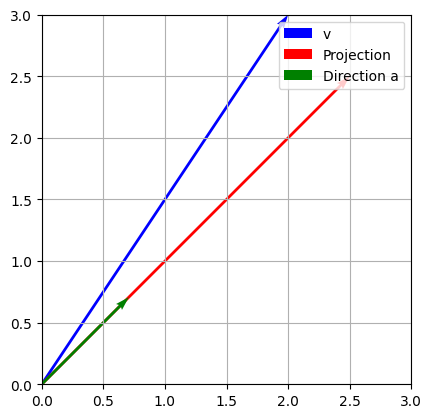

In [17]:
# Define vector v and basis vector a
v = np.array([2, 3])
a = np.array([1, 1])   # direction to project onto
a = a / np.linalg.norm(a)  # normalize

# Orthogonal projection of v onto a
p = (v @ a) * a

# Plot
plt.figure()
plt.quiver(0, 0, v[0], v[1], angles="xy", scale_units="xy", scale=1, color="blue", label="v")
plt.quiver(0, 0, p[0], p[1], angles="xy", scale_units="xy", scale=1, color="red", label="Projection")
plt.quiver(0, 0, a[0], a[1], angles="xy", scale_units="xy", scale=1, color="green", label="Direction a")

plt.xlim(0, 3); plt.ylim(0, 3)
plt.grid(); plt.legend()
plt.gca().set_aspect('equal')
plt.show()

In [18]:
# Projection matrix onto direction a
P = np.outer(a, a)

# Check: P^2 = P (idempotent)
print("P^2 == P ?", np.allclose(P @ P, P))

# Apply projection
proj = P @ v
print("Projection:", proj)

P^2 == P ? True
Projection: [2.5 2.5]


### 3.1.2 Least Squares Problems

In [ ]:
# import library
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Define linear equation
A = np.array([[1, 2],
              [1, 3],
              [0, 0]], dtype=float)

b = np.array([4, 5, 6], dtype=float).reshape(-1, 1)

In [ ]:
# Least Squares
x, residuals, _, _ = linalg.lstsq(A, b)
print("Least squares solution:",x)

Least squares solution: [[2.]
 [1.]]


In [ ]:
b=A@x
print("Fitted vector:","\n", b)

Fitted vector: 
 [[4.]
 [5.]
 [0.]]


In [83]:
print("Sum of squared residuals:", residuals)

NameError: name 'residuals' is not defined

In [59]:
# Least Squares Example

# import libraries
import pandas as pd
from pathlib import Path
from sklearn import linear_model

In [35]:
# Load data
data = {}
f_list = ["solTestX", "solTestY", "solTrainX", "solTrainY"]

for i in f_list :
    data[i] = pd.read_csv('data/'+i+".csv", index_col=0)
    
print("Data Loaded")

Data Loaded


In [36]:
# Split into train/test sets
train_data = data["solTrainX"]
train_label = data["solTrainY"]
test_data = data["solTestX"]
test_label = data["solTestY"]

print("train data : ", train_data.shape)
print("train label : ", train_label.shape)
print("test data : ", test_data.shape)
print("test label : ", test_label.shape)

arr = train_data.columns

train data :  (951, 228)
train label :  (951, 1)
test data :  (316, 228)
test label :  (316, 1)


In [37]:
data["solTestX"].head()

,FP001,FP002,FP003,FP004,FP005,FP006,FP007,FP008,FP009,FP010,...,NumCarbon,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2
20,1,0,0,1,0,0,0,0,1,1,...,2,0,2,0,1,1,0,0.492,37.30,37.30
21,1,0,1,1,0,1,0,0,0,0,...,3,1,2,0,0,0,0,1.317,52.32,52.32
23,0,1,0,0,1,0,0,0,0,1,...,6,0,2,0,0,0,1,0.846,40.46,40.46
25,0,0,1,0,0,1,0,0,0,0,...,5,2,0,0,0,0,1,0.984,24.06,24.06
28,1,1,0,1,1,1,0,1,0,0,...,6,2,1,0,0,0,1,0.843,55.98,55.98


In [38]:
data["solTestY"].head()

,x
1,0.93
2,0.85
3,0.81
4,0.74
5,0.61


In [39]:
# Fit linear regression model
model = linear_model.LinearRegression()
model.fit(train_data, train_label)

LinearRegression()

In [40]:
# Predict on test data
predict_label = model.predict(test_data)

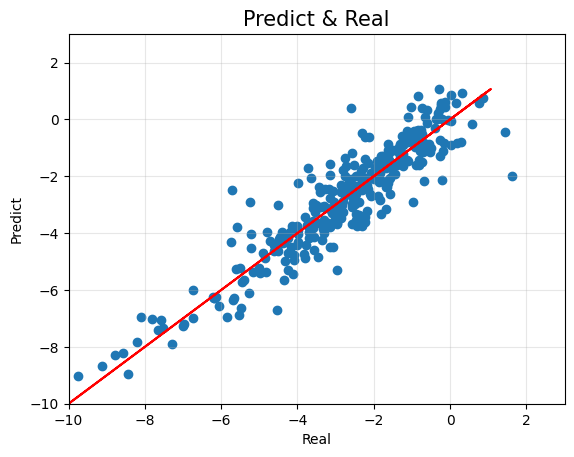

In [60]:
# Scatter plot : predicted vs actual values
plt.scatter(predict_label, test_label.values)

plt.title('Predict & Real', fontdict={'size':15})
plt.xlabel('Real')
plt.ylabel('Predict')

plt.xlim(-10, 3) 
plt.ylim(-10, 3)

plt.plot(test_label, test_label, 'r-') 
plt.grid(alpha=0.3)
plt.show()

In [42]:
# Evaluate model performance (R2 score)
from sklearn import metrics
print("R2 Score = ", metrics.r2_score(predict_label, test_label))

R2 Score =  0.8428978371199276


In [61]:
# Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:\n", model.coef_)

Intercept: [-0.17681118]
Coefficients:
 [[ 2.24985132e-01  9.80294028e-02 -1.11077197e-01 -4.51466605e-01
  -4.34195635e-01  6.77915055e-02 -7.58042188e-02  2.90003901e-02
  -5.78781730e-01  6.62895195e-01  1.39543367e-01 -1.15931807e-01
  -4.66799720e-01  4.91842908e-01 -3.87798322e-01  7.08494107e-02
  -1.73256340e-01 -4.83410418e-01  1.13100945e-01 -1.03054534e-02
   1.07710835e-01 -4.25193781e-02 -4.69965219e-01 -5.58653920e-01
   2.64052968e-01  3.39396741e-01  2.16091342e-03  5.88899677e-02
  -5.51129552e-02 -1.84331104e-01  2.31147031e-01 -1.34065640e+00
   8.92972433e-01 -3.77421242e-01 -1.72018039e-01 -2.11741237e-02
   6.76899087e-02  2.45251459e-01 -2.07164131e-01  6.23375406e-01
  -2.60976445e-01 -8.16471671e-02  5.39822713e-01 -4.21538120e-01
   1.15982030e-01 -1.61288736e-01  6.37332953e-02  3.35803891e-01
   4.87707528e-03 -1.41007012e-01  2.78547424e-01 -2.18228462e-01
   2.02632805e-01 -3.09805353e-02 -2.76903845e-01 -2.95132011e-01
  -3.38243368e-02  1.64608852e-01 -1

In [45]:
# Build regression formula string
col_x = train_data.columns
col_y = train_label.columns
formul = ""
for i in range(0, len(model.coef_.reshape(-1))) :
    if model.coef_.reshape(-1)[i] != 0 :
        formul += str(model.coef_.reshape(-1)[i]) + " * " + col_x[i] + " + "

print("Formula : \n")
print(col_y[0], " = ", formul[:-3], '+', model.intercept_[0])

Formula : 

x  =  0.22498513226931702 * FP001 + 0.0980294028161522 * FP002 + -0.11107719746641496 * FP003 + -0.4514666052125146 * FP004 + -0.4341956353915994 * FP005 + 0.06779150554304526 * FP006 + -0.07580421877369967 * FP007 + 0.029000390084562126 * FP008 + -0.5787817303843575 * FP009 + 0.6628951947462863 * FP010 + 0.1395433666036704 * FP011 + -0.11593180658529137 * FP012 + -0.4667997200505823 * FP013 + 0.49184290814267173 * FP014 + -0.3877983215780526 * FP015 + 0.07084941069785308 * FP016 + -0.17325633982024435 * FP017 + -0.483410418090454 * FP018 + 0.1131009450589062 * FP019 + -0.01030545338601059 * FP020 + 0.10771083502511815 * FP021 + -0.04251937806529674 * FP022 + -0.4699652192257388 * FP023 + -0.5586539202991894 * FP024 + 0.2640529682447619 * FP025 + 0.3393967405724606 * FP026 + 0.0021609134211936776 * FP027 + 0.058889967672429475 * FP028 + -0.055112955213368786 * FP029 + -0.18433110418991372 * FP030 + 0.23114703110971568 * FP031 + -1.3406563980176651 * FP032 + 0.89297243268872

## 3.2 The QR factorization

### 3.2.2 Gram-Schmidt Orthogonazlization

In [65]:
# Import library
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [66]:
# Create random matrix 
m = 4
n = 4
A = np.random.randn(m,n)

# initialize Q matrix for Gram-Schmidt
Q = np.zeros((m,n))


# Classical Gram-Schmidt (QR decomposition)
for i in range(n):
    # initialize
    Q[:,i] = A[:,i]
    
    # orthogonalize
    a = A[:,i] # convenience
    for j in range(i): # only to earlier cols
        q = Q[:,j] # convenience
        Q[:,i]=Q[:,i]-np.dot(a,q)/np.dot(q,q)*q
    
    # normalize
    Q[:,i] = Q[:,i] / np.linalg.norm(Q[:,i])

In [68]:
# Compare with built-in QR
Q2,R = np.linalg.qr(A)

# Q - Q2 shows differences (only up to sign, since Q is unique up to ±1 on each column)
Q-Q2

array([[ 1.53048928e-01,  1.06437629e+00,  1.52707033e+00,
        -7.32747196e-15],
       [-1.50572401e+00,  3.30119547e-01,  4.74776379e-01,
         3.66373598e-15],
       [-1.30263289e+00, -3.95085047e-01, -2.68830154e-01,
         5.55111512e-15],
       [-1.11887400e-01,  1.61308153e+00, -1.17062972e+00,
         1.21500032e-14]])

In [70]:
# Leat squares fitting example
c1, c2 = 5.0, 2.0
i = np.r_[1:11]
i
xi = 0.1*i
yi = c1*np.exp(-xi) + c2*xi
zi = yi + 0.05 * np.max(yi) * np.random.randn(len(yi))

In [ ]:
# Design matrix: first column exp(-x1), second column xi
A = np.c_[np.exp(-xi)[:, np.newaxis], xi[:, np.newaxis]] 

In [72]:
# Solve least squares problem
c, resid, rank, sigma = linalg.lstsq(A, zi) 

In [73]:
# Evaluate fitted curve
xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2

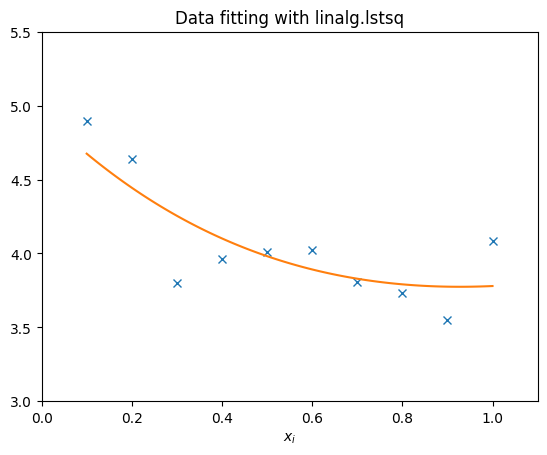

In [74]:
# Plot data & fitted curve
plt.plot(xi,zi,'x',xi2,yi2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

In [75]:
# QR decoomposition for least squares

# Full QR decomposition of design matrix A
q, r = linalg.qr(A)
print("Check A ≈ QR:", np.allclose(A, np.dot(q, r)))
print("Shapes:", A.shape, q.shape, r.shape)

Check A ≈ QR: True
Shapes: (10, 2) (10, 10) (10, 2)


In [ ]:
# Mode='r': return only R
r2 = linalg.qr(A, mode='r')
print("R only (mode='r') matches full R:", np.allclose(r, r2))

True


In [78]:
# Mode='economic': reduced-size Q, R
q3, r3 = linalg.qr(A, mode='economic')
print("Reduced shapes:", q3.shape, r3.shape)

Reduced shapes: (10, 2) (2, 2)


In [82]:
# Solve least squares using reduced QR
rhs = q3.T @ zi
x = np.linalg.solve(r3, rhs)

print("Solution via reduced QR:", x)
print("Solution via lstsq:", c)

Solution via reduced QR: [4.95043421 1.95868874]
Solution via lstsq: [4.95043421 1.95868874]
